# **Data** **Load**

In [3]:
import kagglehub
mantri7_imdb_movie_reviews_dataset_path = kagglehub.dataset_download('mantri7/imdb-movie-reviews-dataset')

print('Data source import complete.')

Data source import complete.


In [4]:
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf
import joblib

2nd


In [5]:
import kagglehub
import os
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf
import joblib

In [6]:
mantri7_imdb_movie_reviews_dataset_path = kagglehub.dataset_download("mantri7/imdb-movie-reviews-dataset")
print("Dataset downloaded to:", mantri7_imdb_movie_reviews_dataset_path)


Dataset downloaded to: /kaggle/input/imdb-movie-reviews-dataset


In [7]:
print("Files in dataset:", os.listdir(mantri7_imdb_movie_reviews_dataset_path))

Files in dataset: ['test_data (1).csv', 'train_data (1).csv']


In [8]:
df =  pd.read_csv('/kaggle/input/imdb-movie-reviews-dataset/test_data (1).csv', header=None, names=["review", "sentiment"])
print(df.head(30000))

                                                  review  sentiment
0                                                      0          1
1      I did not enjoy the film Eraser whatsoever. It...          0
2      Be very afraid of anyone who likes this film. ...          0
3      The 3rd and last big screen spin off from the ...          0
4      Barely three and a half years after just scrap...          1
...                                                  ...        ...
24996  Great just great! The West Coast got "Dirty" H...          1
24997  This movie has all the qualities to be good, S...          1
24998  Personally, I think Kevin Spacey is one of the...          1
24999  I'm not sure as to call this movie a children'...          1
25000  Good to see I'm not the only person who rememb...          1

[25001 rows x 2 columns]


/2nd

# **Preprocessing the Data**

In [9]:
df['clean'] = df['review'].str.replace(r"<[^>]+>", " ", regex=True)
df['clean'] = df['review'].str.lower()

df.head(30)

,review,sentiment,clean
0,0,1,0
1,I did not enjoy the film Eraser whatsoever. It...,0,i did not enjoy the film eraser whatsoever. it...
2,Be very afraid of anyone who likes this film. ...,0,be very afraid of anyone who likes this film. ...
3,The 3rd and last big screen spin off from the ...,0,the 3rd and last big screen spin off from the ...
4,Barely three and a half years after just scrap...,1,barely three and a half years after just scrap...
5,I'm a big fan of the demonic puppets. Looking ...,0,i'm a big fan of the demonic puppets. looking ...
6,"Well, I'll begin with this: I love horror-movi...",0,"well, i'll begin with this: i love horror-movi..."
7,I think this film version of NORTHANGER ABBEY ...,1,i think this film version of northanger abbey ...
8,I saw this version of Hamlet on television man...,1,i saw this version of hamlet on television man...
9,This Asterix is very similar to modern Disney ...,0,this asterix is very similar to modern disney ...


# **Deleting the Colums**

In [10]:
df = df.drop(index=0).reset_index(drop=True)
#del df['review']
df = df[['clean', 'sentiment']]

df.head(30)

,clean,sentiment
0,i did not enjoy the film eraser whatsoever. it...,0
1,be very afraid of anyone who likes this film. ...,0
2,the 3rd and last big screen spin off from the ...,0
3,barely three and a half years after just scrap...,1
4,i'm a big fan of the demonic puppets. looking ...,0
5,"well, i'll begin with this: i love horror-movi...",0
6,i think this film version of northanger abbey ...,1
7,i saw this version of hamlet on television man...,1
8,this asterix is very similar to modern disney ...,0
9,a very positive message for our youth is shown...,1


# **Stopword Removal with spaCy**

In [11]:
from tqdm import tqdm
tqdm.pandas()
spacy.prefer_gpu()
print(f"Using GPU: {spacy.require_gpu()}")

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])

df['clean'] = df['clean'].progress_apply(remove_stopwords)

Using GPU: True


100%|██████████| 25000/25000 [07:05<00:00, 58.73it/s]


2nd


In [12]:
df.head()

,clean,sentiment
0,enjoy film eraser whatsoever awful acting bori...,0
1,afraid likes film probably inhaled paint chips...,0
2,3rd big screen spin popular itv sitcom early 1...,0
3,barely half years scraping month run 7 31 oct ...,1
4,big fan demonic puppets looking surface looks ...,0


# **Dataset Split with Class Distribution**

In [13]:
from sklearn.model_selection import train_test_split

X = df['clean']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

print(f"Total samples: {len(df)}")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(df):.1%})")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(df):.1%})")

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Total samples: 25000
Training set: 20000 samples (80.0%)
Test set: 5000 samples (20.0%)

Class distribution in y_train:
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution in y_test:
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


# **Text Mining Pipeline with Naive Bayes**

In [14]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 1),stop_words=None )),
    ("nb", MultinomialNB())
    ])

nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('nb', MultinomialNB())])

In [15]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 1),
        stop_words=None
    )),
    ("lr", LogisticRegression(max_iter=200, solver="liblinear"))
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('lr', LogisticRegression(max_iter=200, solver='liblinear'))])

# **Training Naive Bayes and Logistic Regression model**


Naive Bayes — Metrics on Test:
Accuracy : 0.8564
Precision: 0.8573
Recall   : 0.8552
F1-score : 0.8562

Classification report:
               precision    recall  f1-score   support

           0     0.8555    0.8576    0.8566      2500
           1     0.8573    0.8552    0.8562      2500

    accuracy                         0.8564      5000
   macro avg     0.8564    0.8564    0.8564      5000
weighted avg     0.8564    0.8564    0.8564      5000



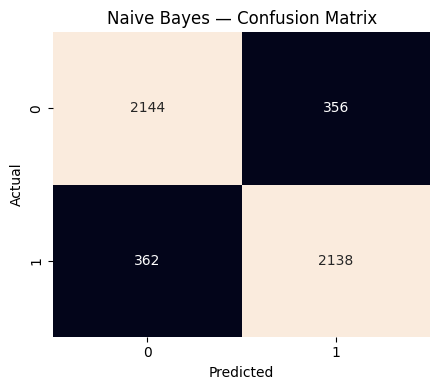


Logistic Regression — Metrics on Test:
Accuracy : 0.8848
Precision: 0.8714
Recall   : 0.9028
F1-score : 0.8868

Classification report:
               precision    recall  f1-score   support

           0     0.8992    0.8668    0.8827      2500
           1     0.8714    0.9028    0.8868      2500

    accuracy                         0.8848      5000
   macro avg     0.8853    0.8848    0.8848      5000
weighted avg     0.8853    0.8848    0.8848      5000



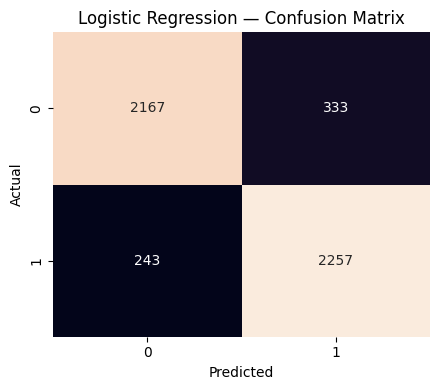

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_pipeline(name, pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    print(f"\n{name} — Metrics on Test:")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
    print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4.5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

evaluate_pipeline("Naive Bayes", nb_pipeline, X_test, y_test)
evaluate_pipeline("Logistic Regression", lr_pipeline, X_test, y_test)

**Automatically finds the best hyperparameters by Grid search**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best CV accuracy: 0.8908000000000001
Best params: {'lr__C': 3, 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 2)}

LogReg (GridSearch best) — Metrics on Test:
Accuracy : 0.8912
Precision: 0.8779
Recall   : 0.9088
F1-score : 0.8931

Classification report:
               precision    recall  f1-score   support

           0     0.9055    0.8736    0.8893      2500
           1     0.8779    0.9088    0.8931      2500

    accuracy                         0.8912      5000
   macro avg     0.8917    0.8912    0.8912      5000
weighted avg     0.8917    0.8912    0.8912      5000



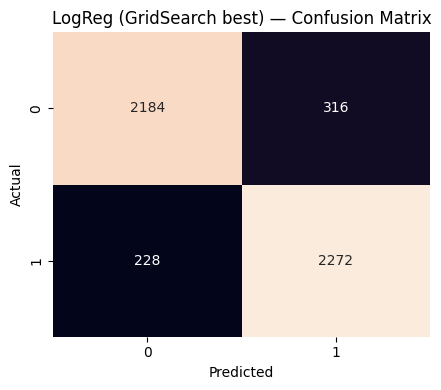

In [19]:
from sklearn.model_selection import GridSearchCV

grid_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words=None)),
    ("lr", LogisticRegression(max_iter=300, solver="liblinear"))
])

param_grid = {
    "tfidf__max_features": [3000, 5000, 7000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "lr__C": [0.1, 1, 3, 10]}

grid_search = GridSearchCV(
    estimator=grid_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best CV accuracy:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)

best_lr_pipeline = grid_search.best_estimator_
evaluate_pipeline("LogReg (GridSearch best)", best_lr_pipeline, X_test, y_test)

with open("lr_pipeline_best.pkl", "wb") as f:
    pickle.dump(best_lr_pipeline, f)

# **CNN gives the better accuracy rate over Data**

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import TextVectorization, Embedding

In [21]:
# Text Indexing
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
vectorizer.adapt(X_train.to_numpy())

# Embedding Layer
embedding_layer = Embedding(input_dim=20000, output_dim=128, input_length=200)

model = Sequential([vectorizer, embedding_layer, GlobalMaxPooling1D(),Dense(1, activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
max_words = 25000   # limit vocabulary size
max_len = 200       # truncate long reviews

# Ensure data is plain Python list of strings
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_list)

X_train_seq = tokenizer.texts_to_sequences(X_train_list)
X_test_seq = tokenizer.texts_to_sequences(X_test_list)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [23]:
# CNN Model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6371 - loss: 0.6071 - val_accuracy: 0.8685 - val_loss: 0.3114
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9218 - loss: 0.2155 - val_accuracy: 0.8865 - val_loss: 0.2820
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0607 - val_accuracy: 0.8795 - val_loss: 0.3550
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0139 - val_accuracy: 0.8780 - val_loss: 0.4349
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accuracy: 0.8785 - val_loss: 0.5151
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8795 - val_loss: 0.5784
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8760 - val_loss: 0.6027
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.5773e-04 - val_accura

In [25]:
# Predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.8732

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2500
           1       0.87      0.87      0.87      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000


Confusion Matrix:
 [[2183  317]
 [ 317 2183]]


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Model saved**

In [27]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# --- Naive Bayes Pipeline ---
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,1), stop_words=None)),
    ("nb", MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

# Save to Google Drive
with open("/content/drive/MyDrive/nb_pipeline.pkl", "wb") as f:
    pickle.dump(nb_pipeline, f)

# --- Logistic Regression Pipeline ---
lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,1), stop_words=None)),
    ("lr", LogisticRegression(max_iter=200, solver="liblinear"))
])
lr_pipeline.fit(X_train, y_train)

# Save to Google Drive
with open("/content/drive/MyDrive/lr_pipeline.pkl", "wb") as f:
    pickle.dump(lr_pipeline, f)

print("NB and LR pipelines saved to Google Drive!")

NB and LR pipelines saved to Google Drive!


In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Save CNN model
model.save("/content/drive/MyDrive/cnn_model.h5")
print("CNN model saved to Google Drive!")

# Save tokenizer
with open("/content/drive/MyDrive/cnn_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("CNN tokenizer saved to Google Drive!")

CNN model saved to Google Drive!
CNN tokenizer saved to Google Drive!


In [ ]:
# --- Naive Bayes ---
vectorizer_nb = TfidfVectorizer(max_features=5000)
X_train_tfidf_nb = vectorizer_nb.fit_transform(X_train)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf_nb, y_train)

# --- Logistic Regression ---
vectorizer_lr = TfidfVectorizer(max_features=5000)
X_train_tfidf_lr = vectorizer_lr.fit_transform(X_train)
log_reg = LogisticRegression(max_iter=200, solver='liblinear')
log_reg.fit(X_train_tfidf_lr, y_train)

# --- CNN ---
max_words = 25000
max_len = 200
tokenizer_cnn = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer_cnn.fit_on_texts(X_train.tolist())
X_train_pad = pad_sequences(tokenizer_cnn.texts_to_sequences(X_train.tolist()), maxlen=max_len, padding='post')

cnn_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train, validation_split=0.1, epochs=3, batch_size=64, verbose=1)

# ======== SENTIMENT CHECK FUNCTION =========
def predict_sentiment(comment, model_type="nb"):
    """
    model_type can be: "nb", "lr", or "cnn"
    """
    if model_type == "nb":
        comment_tfidf = vectorizer_nb.transform([comment])
        pred = nb_model.predict(comment_tfidf)[0]
    elif model_type == "lr":
        comment_tfidf = vectorizer_lr.transform([comment])
        pred = log_reg.predict(comment_tfidf)[0]
    elif model_type == "cnn":
        seq = tokenizer_cnn.texts_to_sequences([comment])
        pad = pad_sequences(seq, maxlen=max_len, padding='post')
        pred_prob = cnn_model.predict(pad, verbose=0)[0][0]
        pred = int(pred_prob >= 0.5)
    else:
        raise ValueError("Invalid model_type! Choose 'nb', 'lr', or 'cnn'.")

    sentiment = "Positive" if pred == 1 else "Negative"
    return sentiment

# ======== INTERACTIVE USAGE =========
while True:
    text = input("Enter a comment (or 'quit' to exit): ")
    if text.lower() == "quit":
        break
    for model in ["nb", "lr", "cnn"]:
        print(f"{model.upper()} → {predict_sentiment(text, model)}")
    print("-" * 40)

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6452 - loss: 0.5966 - val_accuracy: 0.8710 - val_loss: 0.3088
Epoch 2/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9283 - loss: 0.1966 - val_accuracy: 0.8880 - val_loss: 0.2812
Epoch 3/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9884 - loss: 0.0508 - val_accuracy: 0.8805 - val_loss: 0.3580
Enter a comment (or 'quit' to exit): He is a good boy.
NB → Positive
LR → Positive
CNN → Positive
----------------------------------------
Enter a comment (or 'quit' to exit): She sings well.
NB → Positive
LR → Positive
CNN → Negative
----------------------------------------
Enter a comment (or 'quit' to exit): Nasrin is a good woman.
NB → Negative
LR → Negative
CNN → Negative
----------------------------------------
Enter a comment (or 'quit' to exit): Foysal is a good man.
NB → Positive
LR → Positive
CNN → Positive
----------------------------------------
Enter a comment (or 'quit' to exit): Foysal is a good husband.
N